In [1]:
pip install diagrams

Note: you may need to restart the kernel to use updated packages.


# Nodes diagrams

In [1]:
#Diagram represents a global diagram context.
#You can create a diagram context with Diagram class. 
#The first parameter of Diagram constructor will be used for output filename.

# diagram.py
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Web Service", show=False):
    ELB("lb") >> EC2("web") >> RDS("userdb")

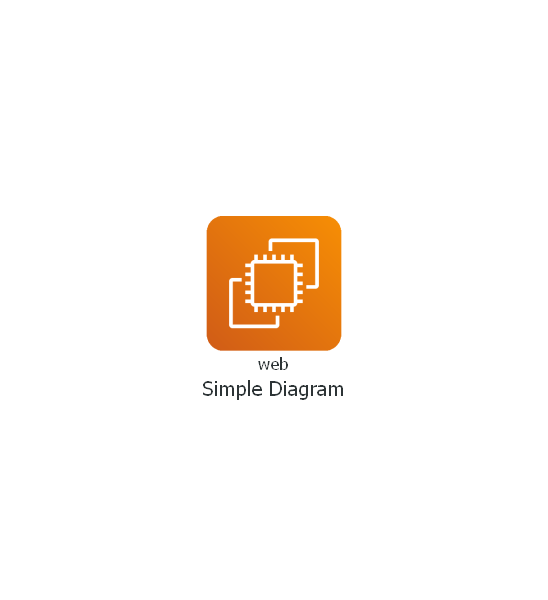

In [2]:
#Diagrams can be also rendered directly inside the notebook as like this:

from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram") as diag:
    EC2("web")
diag

In [3]:
#You can specify the output file format with outformat parameter. Default is png.

#(png, jpg, svg, and pdf) are allowed.

from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram", outformat="jpg"):
    EC2("web")

In [4]:
#You can specify the output filename with filename parameter. 
#The extension shouldn't be included, it's determined by the outformat parameter.

from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram", filename="my_diagram"):
    EC2("web")

In [5]:
#You can also disable the automatic file opening by setting the show parameter as false. Default is true.

from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram("Simple Diagram", show=False):
    EC2("web")

In [6]:
#It allows custom Graphviz dot attributes options.

#graph_attr, node_attr and edge_attr are supported. 

from diagrams import Diagram
from diagrams.aws.compute import EC2

graph_attr = {
    "fontsize": "45",
    "bgcolor": "transparent"
}

with Diagram("Simple Diagram", show=False, graph_attr=graph_attr):
    EC2("web")

In [7]:
#Data Flow
#You can represent data flow by connecting the nodes with these operators: >>, << and -.

#>>: Connect nodes in left to right direction.
#<<: Connect nodes in right to left direction.
#-: Connect nodes in no direction. Undirected.

#Be careful when using the - and any shift operators together, which could cause unexpected results due to operator precedence.
#The order of rendered diagrams is the reverse of the declaration order.

from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB
from diagrams.aws.storage import S3

with Diagram('Web Services', show=False):
    ELB('lb') >> EC2('web') >> RDS('userdb') >> S3('store')
    ELB('lb') >> EC2('web') >> RDS('userdb') << EC2('stat')
    (ELB('lb') >> EC2('web')) - EC2('web') >> RDS('userdb')

In [8]:
#Grouped Workers on AWS
from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Grouped Workers", show=False, direction="TB"):
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")

In [9]:
#Clustered Web Services
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.aws.database import ElastiCache, RDS
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53

with Diagram("Clustered Web Services", show=False):
    dns = Route53("dns")
    lb = ELB("lb")

    with Cluster("Services"):
        svc_group = [ECS("web1"),
                     ECS("web2"),
                     ECS("web3")]

    with Cluster("DB Cluster"):
        db_primary = RDS("userdb")
        db_primary - [RDS("userdb ro")]

    memcached = ElastiCache("memcached")

    dns >> lb >> svc_group
    svc_group >> db_primary
    svc_group >> memcached

In [10]:
#Event Processing on AWS
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=False):
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw

In [11]:
#Message Collecting System on GCP
from diagrams import Cluster, Diagram
from diagrams.gcp.analytics import BigQuery, Dataflow, PubSub
from diagrams.gcp.compute import AppEngine, Functions
from diagrams.gcp.database import BigTable
from diagrams.gcp.iot import IotCore
from diagrams.gcp.storage import GCS

with Diagram("Message Collecting", show=False):
    pubsub = PubSub("pubsub")

    with Cluster("Source of Data"):
        [IotCore("core1"),
         IotCore("core2"),
         IotCore("core3")] >> pubsub

    with Cluster("Targets"):
        with Cluster("Data Flow"):
            flow = Dataflow("data flow")

        with Cluster("Data Lake"):
            flow >> [BigQuery("bq"),
                     GCS("storage")]

        with Cluster("Event Driven"):
            with Cluster("Processing"):
                flow >> AppEngine("engine") >> BigTable("bigtable")

            with Cluster("Serverless"):
                flow >> Functions("func") >> AppEngine("appengine")

    pubsub >> flow

In [12]:
#You can change the data flow direction with direction parameter. Default is LR.

#(TB, BT, LR and RL) are allowed.

from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Workers", show=False, direction="TB"):
    lb = ELB("lb")
    db = RDS("events")
    lb >> EC2("worker1") >> db
    lb >> EC2("worker2") >> db
    lb >> EC2("worker3") >> db
    lb >> EC2("worker4") >> db
    lb >> EC2("worker5") >> db

In [13]:
#Group Data Flow
#Above worker example has too many redundant flows. In this case, you can group nodes into a list so that all nodes are connected to other nodes at once.

from diagrams import Diagram
from diagrams.aws.compute import EC2
from diagrams.aws.database import RDS
from diagrams.aws.network import ELB

with Diagram("Grouped Workers", show=False, direction="TB"):
    ELB("lb") >> [EC2("worker1"),
                  EC2("worker2"),
                  EC2("worker3"),
                  EC2("worker4"),
                  EC2("worker5")] >> RDS("events")

# Clusters

In [14]:
#Cluster represents a local cluster context.

#You can create a cluster context with Cluster class. 
#And you can also connect the nodes in a cluster to other nodes outside a cluster.

from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.aws.database import RDS
from diagrams.aws.network import Route53

with Diagram("Simple Web Service with DB Cluster", show=False):
    dns = Route53("dns")
    web = ECS("service")

    with Cluster("DB Cluster"):
        db_primary = RDS("primary")
        db_primary - [RDS("replica1"),
                     RDS("replica2")]

    dns >> web >> db_primary

In [15]:
#Nested Clusters
#Nested clustering is also possible.

from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS, EKS, Lambda
from diagrams.aws.database import Redshift
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3

with Diagram("Event Processing", show=False):
    source = EKS("k8s source")

    with Cluster("Event Flows"):
        with Cluster("Event Workers"):
            workers = [ECS("worker1"),
                       ECS("worker2"),
                       ECS("worker3")]

        queue = SQS("event queue")

        with Cluster("Processing"):
            handlers = [Lambda("proc1"),
                        Lambda("proc2"),
                        Lambda("proc3")]

    store = S3("events store")
    dw = Redshift("analytics")

    source >> workers >> queue >> handlers
    handlers >> store
    handlers >> dw

# Edges

In [16]:
#Edges
#Edge is representing an edge between Nodes.

#Basic
#Edge is an object representing a connection between Nodes with some additional properties.

#An edge object contains three attributes: label, color and style which mirror corresponding graphviz edge attributes.


from diagrams import Cluster, Diagram, Edge
from diagrams.onprem.analytics import Spark
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.aggregator import Fluentd
from diagrams.onprem.monitoring import Grafana, Prometheus
from diagrams.onprem.network import Nginx
from diagrams.onprem.queue import Kafka

with Diagram(name="Advanced Web Service with On-Premise (colored)", show=False):
    ingress = Nginx("ingress")

    metrics = Prometheus("metric")
    metrics << Edge(color="firebrick", style="dashed") << Grafana("monitoring")

    with Cluster("Service Cluster"):
        grpcsvc = [
            Server("grpc1"),
            Server("grpc2"),
            Server("grpc3")]

    with Cluster("Sessions HA"):
        primary = Redis("session")
        primary \
            - Edge(color="brown", style="dashed") \
            - Redis("replica") \
            << Edge(label="collect") \
            << metrics
        grpcsvc >> Edge(color="brown") >> primary

    with Cluster("Database HA"):
        primary = PostgreSQL("users")
        primary \
            - Edge(color="brown", style="dotted") \
            - PostgreSQL("replica") \
            << Edge(label="collect") \
            << metrics
        grpcsvc >> Edge(color="black") >> primary

    aggregator = Fluentd("logging")
    aggregator \
        >> Edge(label="parse") \
        >> Kafka("stream") \
        >> Edge(color="black", style="bold") \
        >> Spark("analytics")

    ingress \
        >> Edge(color="darkgreen") \
        << grpcsvc \
        >> Edge(color="darkorange") \
        >> aggregator